In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set()
from jupyterthemes import jtplot
# jtplot.style()

jtplot.style('grade3', 
             context='paper', 
             fscale=1.5,
             ticks=True, 
             grid=False)

# jtplot.figsize(x=15., y=9.,aspect=1.2)

%matplotlib inline

<br>
<br>
# Explore the data
<br>
<br>
The first thing we should do at the very beginning of any data analysis is to get a feel for the data.
Questions on the following lines should be asked,
+ Do the columns make sense?
+ Do the values make sense?
+ Are there any missing values?
+ Are there any outliers? If yes, what's their story?
+ Which variables are strongly correlated?

In [2]:
df = pd.read_csv("HR_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# let's clean up the data
df.rename(columns={'sales':'department'},inplace=True)
df_n = pd.get_dummies(df,columns=['department','salary'])

In [7]:
df_n.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


<br>
<br>
So, no missing values in this dataset. Let's move on to understanding the correlation between various features.
<br>
<br>
** Correlation **
<br>
<br>

In [8]:

corr_mat = df_n.corr()

/home/skd/anaconda2/envs/data-science-portfolio/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/skd/anaconda2/envs/data-science-portfolio/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


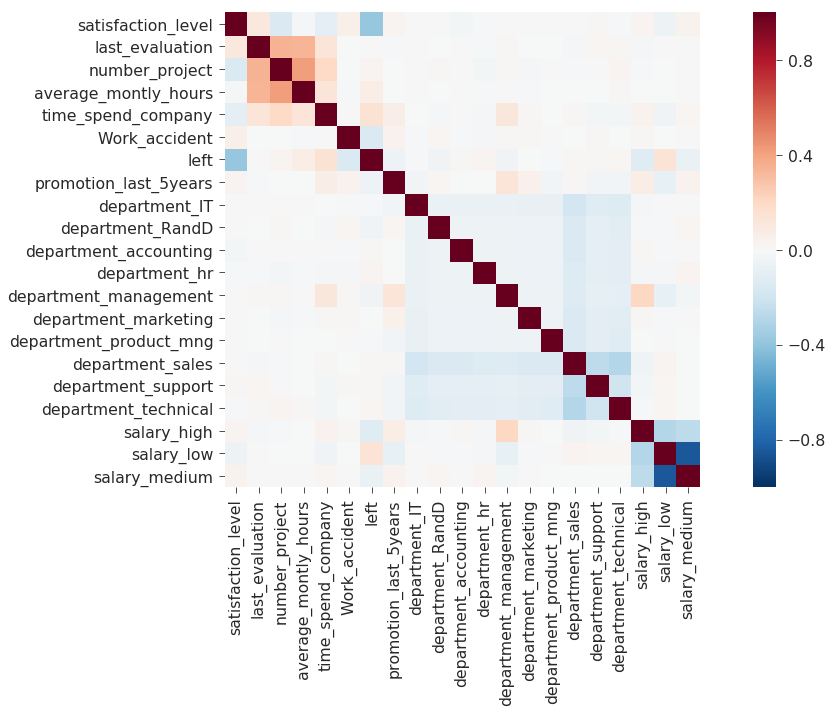

In [9]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10));
# Draw the heatmap using seaborn
sns.heatmap(corr_mat, square=True, ax=ax);


<br>
<br>
A couple of interesting observations.
+ The taget variable "left" is negatively correlated with "satisfaction level" which makes sense because employees are more likely 
to leave if they are not satisfied with their work.
+ Management department is positively correlated with high salary and promotions in last 5 years

In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<br>
<br>
**How does satisfaction level vary among employees who left?**
<br>
<br>
From the plot, it seems that employees who left are less satisfied on an average.

<br>
<br>

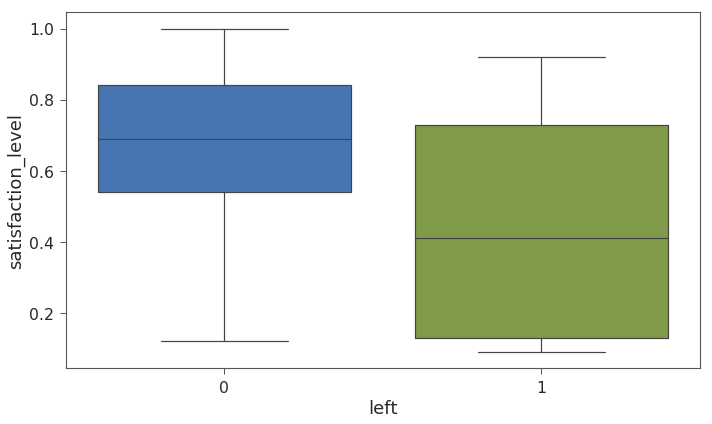

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='left',y='satisfaction_level',data=df);

<br>
<br>
**Does having more number of projects have any impact on employee churn?**
<br>
<br>

From the plots, it seems that people who churn (1) generally tend to have more projects than people who stay (0). From the Boxplot/CDF we can see that, ~50% of churners have 4 or more projects.
<br>
<br>

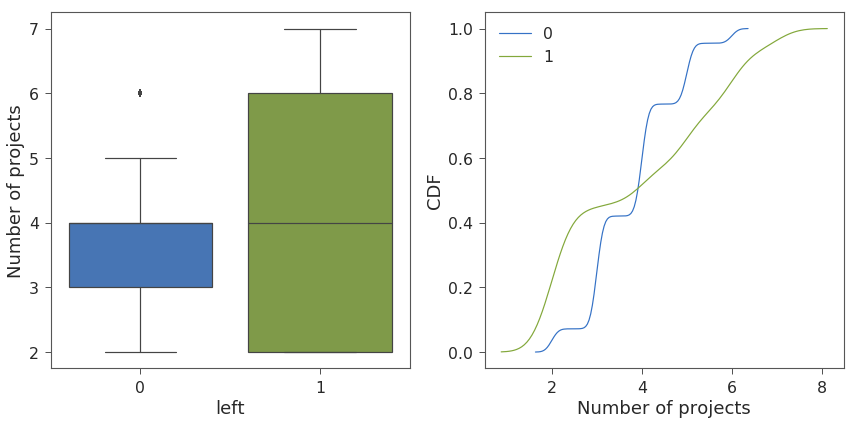

In [12]:
fig,axarr = plt.subplots(ncols=2,figsize=(12,6))
# plt.figure(figsize=(10,6))
sns.boxplot(x='left',y='number_project',data=df,ax=axarr[0]);
sns.kdeplot(df[df.left==0].number_project,label=0,cumulative=True,ax=axarr[1]);
sns.kdeplot(df[df.left==1].number_project,label=1,cumulative=True,ax=axarr[1]);
axarr[0].set_ylabel("Number of projects")
axarr[1].set_ylabel("CDF")
axarr[1].set_xlabel("Number of projects");

<br>
<br>
** Does staying in the company for a long time make the employees more vulnerable to churn? **
<br>
<br>

In [69]:
left_over_years = pd.crosstab(df.time_spend_company,df.left,margins=True,normalize='index')
left_over_years = left_over_years[left_over_years.index!='All']
left_over_years = left_over_years.round(2)
left_over_years.head()

left,0,1
time_spend_company,,
2,0.98,0.02
3,0.75,0.25
4,0.65,0.35
5,0.43,0.57
6,0.71,0.29


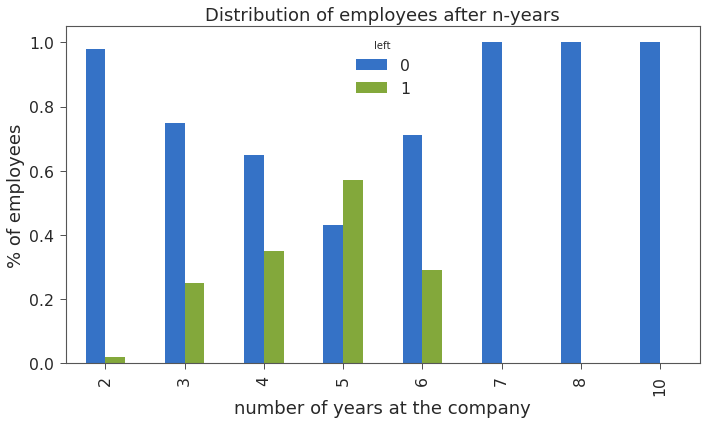

In [68]:
fig, ax = plt.subplots(figsize=(10,6))
_ = left_over_years.plot(kind='bar',ax=ax)
_ = plt.xlabel("number of years at the company")
_ = plt.ylabel("% of employees")
_ = plt.title("Distribution of employees after n-years")

<br>
<br>

It's seen that employees start churning after completing 3 years at the company. There's an upward trend from year-3 onwards till year-5. Almost 57% of people who completed 5 years at the company churn. Then we see a downward trend after year 6. People who has spent 7 years or more are unlikely to churn.

<br>

Why do people churn the most after 5 years? Is it because of promotion or some other factors are at play?

<br>
<br>

In [85]:
employee_spent_5_years = df[df.time_spend_company==5]
emp_5_yrs_df = pd.crosstab(employee_spent_5_years.promotion_last_5years, employee_spent_5_years.left,margins=True,normalize='index')
emp_5_yrs_df = emp_5_yrs_df[emp_5_yrs_df.index!='All']
emp_5_yrs_df = emp_5_yrs_df.round(2)
emp_5_yrs_df

left,0,1
promotion_last_5years,,
0,0.43,0.57
1,0.94,0.06


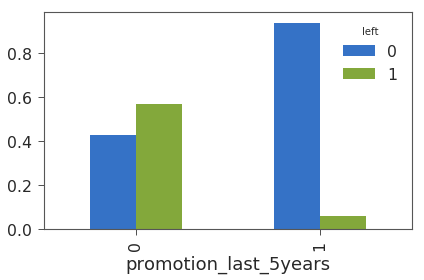

In [86]:
emp_5_yrs_df.plot(kind='bar')

<br>
<br>

This is interesting. 57% of the employees who haven't been given any promotion in last 5 years surely churn.
While, 94% of employees who have been given promotion in last 5 years surely stay!

<br>
<br>